In [24]:
#import dependencies
import numpy as np
import pandas as pd
import requests
from pathlib import Path 
from sklearn.linear_model import LinearRegression
from io import StringIO
import seaborn as sns

import matplotlib.pyplot as plt

In [25]:
file_path = ("Resources/winemag-data_first150k.csv")
df = pd.read_csv(file_path)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [26]:
df = df.drop(['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'winery'], axis=1)
df

,country,points,price,province,variety
0,US,96,235.0,California,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Tinta de Toro
2,US,96,90.0,California,Sauvignon Blanc
3,US,96,65.0,Oregon,Pinot Noir
4,France,95,66.0,Provence,Provence red blend
...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,White Blend
150926,France,91,27.0,Champagne,Champagne Blend
150927,Italy,91,20.0,Southern Italy,White Blend
150928,France,90,52.0,Champagne,Champagne Blend


In [27]:
df = df.dropna()
df

,country,points,price,province,variety
0,US,96,235.0,California,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Tinta de Toro
2,US,96,90.0,California,Sauvignon Blanc
3,US,96,65.0,Oregon,Pinot Noir
4,France,95,66.0,Provence,Provence red blend
...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,White Blend
150926,France,91,27.0,Champagne,Champagne Blend
150927,Italy,91,20.0,Southern Italy,White Blend
150928,France,90,52.0,Champagne,Champagne Blend


In [28]:
df.isnull().sum()

country     0
points      0
price       0
province    0
variety     0
dtype: int64

In [29]:
point_mean_count = pd.DataFrame(df.groupby('country')['points'].mean())
point_mean_count['count'] = pd.DataFrame(df.groupby('country')['points'].count())
price_mean_count = pd.DataFrame(df.groupby('country')['price'].mean())

In [30]:
point_mean_count

,points,count
country,,
Albania,88.000000,2
Argentina,86.001074,5587
Australia,87.881488,4894
Austria,89.190898,2483
Bosnia and Herzegovina,84.750000,4
Brazil,83.240000,25
Bulgaria,85.467532,77
Canada,88.221649,194
Chile,86.298127,5766


In [31]:
wine_merge_df = pd.merge(left=point_mean_count, right=price_mean_count, left_on='country', right_on='country')
wine_merge_df

,points,count,price
country,,,
Albania,88.000000,2,20.000000
Argentina,86.001074,5587,20.794881
Australia,87.881488,4894,31.258480
Austria,89.190898,2483,31.192106
Bosnia and Herzegovina,84.750000,4,12.750000
Brazil,83.240000,25,19.920000
Bulgaria,85.467532,77,11.545455
Canada,88.221649,194,34.628866
Chile,86.298127,5766,19.344780


In [32]:
wine_merge_df.describe()

,points,count,price
count,46.000000,46.000000,46.000000
mean,86.383968,2983.260870,24.728720
std,2.130480,9687.475861,10.273404
min,81.500000,1.000000,10.000000
25%,84.839591,8.000000,16.796763
50%,86.566351,56.500000,23.554217
75%,87.970372,1895.750000,30.667889
max,92.750000,62139.000000,50.000000


In [33]:
wine_country_df = wine_merge_df[wine_merge_df['count'] >= 30]
wine_country_df

,points,count,price
country,,,
Argentina,86.001074,5587,20.794881
Australia,87.881488,4894,31.258480
Austria,89.190898,2483,31.192106
Bulgaria,85.467532,77,11.545455
Canada,88.221649,194,34.628866
Chile,86.298127,5766,19.344780
Croatia,86.493976,83,23.108434
Cyprus,85.870968,31,15.483871
France,88.603314,14785,45.619885


In [34]:
wine_country_df = wine_country_df.drop(['count'], axis=1)
wine_country_df

,points,price
country,,
Argentina,86.001074,20.794881
Australia,87.881488,31.258480
Austria,89.190898,31.192106
Bulgaria,85.467532,11.545455
Canada,88.221649,34.628866
Chile,86.298127,19.344780
Croatia,86.493976,23.108434
Cyprus,85.870968,15.483871
France,88.603314,45.619885


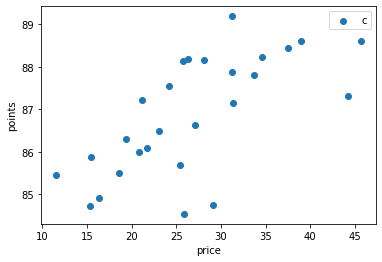

In [48]:
plt.scatter(wine_country_df.price, wine_country_df.points)
plt.xlabel('price')
plt.ylabel('points')
plt.show()

In [36]:
X = wine_country_df.price.values.reshape(-1, 1)
X[:5]

array([[20.79488097],
       [31.25847977],
       [31.19210632],
       [11.54545455],
       [34.62886598]])

In [37]:
X.shape

(27, 1)

In [39]:
y = wine_country_df.points

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(27,)


No handles with labels found to put in legend.


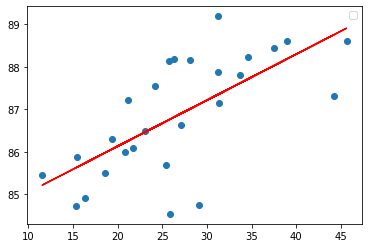

In [47]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [41]:
print(model.coef_)
print(model.intercept_)

[0.10833313]
83.96674755290016
